In [1]:
import pandas as pd
import numpy as np
import folium
from ipyleaflet import Map, Polyline

import warnings
warnings.simplefilter("ignore", UserWarning)

from features.map import *

In [2]:
# Load the traffic data CSV file into a pandas DataFrame
df_traffic = pd.read_csv('data/data/E-tmja-2019.csv', sep=";")
df_traffic

,dateReferentiel,route,longueur,prD,depPrD,concessionPrD,absD,cumulD,xD,yD,...,absF,cumulF,xF,yF,zF,anneeMesureTrafic,typeComptageTrafic,typeComptageTrafic_lib,TMJA,ratio_PL
0,01/01/2019,31D0044,44,0,31,N,0,0,"511656,78","6204078,36",...,44,44,"511698,51","6204063,93",0,NaN,NaN,NaN,NaN,NaN
1,01/01/2019,31D0044E,762,0,31,N,0,0,"511367,22","6204210,06",...,762,762,"511880,76","6203732,4",0,NaN,NaN,NaN,NaN,NaN
2,01/01/2019,69D0301,6055,2,69,N,-981,0,"844036,84","6510806,45",...,71,6055,"849346,89","6509342,34",0,NaN,NaN,NaN,NaN,NaN
3,01/01/2019,69D0383,13752,4,69,N,-494,0,"846831,3","6522372,16",...,544,13752,"843537,87","6512429,8",0,NaN,NaN,NaN,NaN,NaN
4,01/01/2019,69D0383BPNL,2408,0,69,N,0,0,"844982,46","6522772,27",...,413,2408,"846831,3","6522372,16",0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,01/01/2019,N1338,2060,8,76,N,0,0,"560104,39","6927892,82",...,960,2060,"559383,28","6929517,35",0,0.0,NaN,NaN,NaN,NaN
4691,01/01/2019,P0224,8995,211,31,N,-638,0,"555988,61","6288880,3",...,344,8995,"562812,02","6287175,9",0,NaN,NaN,NaN,NaN,NaN
4692,01/01/2019,P0524,1777,31,33,N,-768,0,"440252,1","6361052,92",...,1009,1777,"440343,36","6359374,43",0,NaN,NaN,NaN,NaN,NaN
4693,01/01/2019,P0524,3860,31,33,N,1009,1777,"458798,85","6325912,32",...,568,5637,"458785,94","6322872,51",0,NaN,NaN,NaN,NaN,NaN


In [3]:
df_traffic.columns

Index(['dateReferentiel', 'route', 'longueur', 'prD', 'depPrD',
       'concessionPrD', 'absD', 'cumulD', 'xD', 'yD', 'zD', 'prF', 'depPrF',
       'concessionPrF', 'absF', 'cumulF', 'xF', 'yF', 'zF',
       'anneeMesureTrafic', 'typeComptageTrafic', 'typeComptageTrafic_lib',
       'TMJA', 'ratio_PL'],
      dtype='object')

In [4]:
df_traffic = preprocess_data(df_traffic)
df_traffic

,dateReferentiel,route,longueur,prD,depPrD,concessionPrD,absD,cumulD,xD,yD,...,cumulF,xF,yF,zF,anneeMesureTrafic,typeComptageTrafic,typeComptageTrafic_lib,TMJA,ratio_PL,TMJA_PL
0,01/01/2019,31D0044,44.0,0,31,N,0,0,"511656,78","6204078,36",...,44,"511698,51","6204063,93",0,NaN,NaN,NaN,NaN,0.0,NaN
1,01/01/2019,31D0044E,762.0,0,31,N,0,0,"511367,22","6204210,06",...,762,"511880,76","6203732,4",0,NaN,NaN,NaN,NaN,0.0,NaN
2,01/01/2019,69D0301,6055.0,2,69,N,-981,0,"844036,84","6510806,45",...,6055,"849346,89","6509342,34",0,NaN,NaN,NaN,NaN,0.0,NaN
3,01/01/2019,69D0383,13752.0,4,69,N,-494,0,"846831,3","6522372,16",...,13752,"843537,87","6512429,8",0,NaN,NaN,NaN,NaN,0.0,NaN
4,01/01/2019,69D0383BPNL,2408.0,0,69,N,0,0,"844982,46","6522772,27",...,2408,"846831,3","6522372,16",0,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,01/01/2019,N1338,2060.0,8,76,N,0,0,"560104,39","6927892,82",...,2060,"559383,28","6929517,35",0,0.0,NaN,NaN,NaN,0.0,NaN
4691,01/01/2019,P0224,8995.0,211,31,N,-638,0,"555988,61","6288880,3",...,8995,"562812,02","6287175,9",0,NaN,NaN,NaN,NaN,0.0,NaN
4692,01/01/2019,P0524,1777.0,31,33,N,-768,0,"440252,1","6361052,92",...,1777,"440343,36","6359374,43",0,NaN,NaN,NaN,NaN,0.0,NaN
4693,01/01/2019,P0524,3860.0,31,33,N,1009,1777,"458798,85","6325912,32",...,5637,"458785,94","6322872,51",0,NaN,NaN,NaN,NaN,0.0,NaN


In [5]:
data = add_lat_lon_columns(df_traffic)
data

C:\Users\chach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\chach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\chach\OneDrive - HE

,dateReferentiel,route,longueur,prD,depPrD,concessionPrD,absD,cumulD,xD,yD,...,anneeMesureTrafic,typeComptageTrafic,typeComptageTrafic_lib,TMJA,ratio_PL,TMJA_PL,lonD,latD,lonF,latF
0,01/01/2019,31D0044,44.0,0,31,N,0,0,511656.78,6204078.36,...,NaN,NaN,NaN,NaN,0.0,NaN,0.695459,42.911382,0.695975,42.911263
1,01/01/2019,31D0044E,762.0,0,31,N,0,0,511367.22,6204210.06,...,NaN,NaN,NaN,NaN,0.0,NaN,0.691871,42.912490,0.698322,42.908331
2,01/01/2019,69D0301,6055.0,2,69,N,-981,0,844036.84,6510806.45,...,NaN,NaN,NaN,NaN,0.0,NaN,4.850575,45.681629,4.918315,45.667307
3,01/01/2019,69D0383,13752.0,4,69,N,-494,0,846831.3,6522372.16,...,NaN,NaN,NaN,NaN,0.0,NaN,4.890020,45.785151,4.844653,45.696348
4,01/01/2019,69D0383BPNL,2408.0,0,69,N,0,0,844982.46,6522772.27,...,NaN,NaN,NaN,NaN,0.0,NaN,4.866352,45.789149,4.890020,45.785151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,01/01/2019,N1338,2060.0,8,76,N,0,0,560104.39,6927892.82,...,0.0,NaN,NaN,NaN,0.0,NaN,1.071779,49.435101,1.061294,49.449539
4691,01/01/2019,P0224,8995.0,211,31,N,-638,0,555988.61,6288880.3,...,NaN,NaN,NaN,NaN,0.0,NaN,1.214224,43.684301,1.299264,43.670324
4692,01/01/2019,P0524,1777.0,31,33,N,-768,0,440252.1,6361052.92,...,NaN,NaN,NaN,NaN,0.0,NaN,-0.256575,44.300286,-0.254565,44.285224
4693,01/01/2019,P0524,3860.0,31,33,N,1009,1777,458798.85,6325912.32,...,NaN,NaN,NaN,NaN,0.0,NaN,-0.007509,43.990867,-0.006227,43.963525


In [6]:
data['dateReferentiel'].min()

'01/01/2019'

In [7]:
data['dateReferentiel'].max()

'01/01/2019'

In [8]:
len(data['route'].unique())

323

In [9]:
# create a map centered on France
m = Map(center=(46.5, 2), zoom=6)

# create a polyline for each road based on its start and end coordinates
for idx, row in data.iterrows():
    # get the start and end latitude/longitude coordinates
    start_lat, start_lon = row['latD'], row['lonD']
    end_lat, end_lon = row['latF'], row['lonF']
    
    # create a polyline and add it to the map
    line = Polyline(locations=[(start_lat, start_lon), (end_lat, end_lon)], color='red', weight=3)
    m.add_layer(line)

# display the map
m


Map(center=[46.5, 2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_te…

### Analyse par region

In [9]:
data_r = add_region_column(data)
data_r.head()

,dateReferentiel,route,longueur,prD,depPrD,concessionPrD,absD,cumulD,xD,yD,...,typeComptageTrafic,typeComptageTrafic_lib,TMJA,ratio_PL,TMJA_PL,lonD,latD,lonF,latF,region
0,01/01/2019,31D0044,44.0,0,31,N,0,0,511656.78,6204078.36,...,NaN,NaN,NaN,0.0,NaN,0.695459,42.911382,0.695975,42.911263,Occitanie
1,01/01/2019,31D0044E,762.0,0,31,N,0,0,511367.22,6204210.06,...,NaN,NaN,NaN,0.0,NaN,0.691871,42.912490,0.698322,42.908331,Occitanie
2,01/01/2019,69D0301,6055.0,2,69,N,-981,0,844036.84,6510806.45,...,NaN,NaN,NaN,0.0,NaN,4.850575,45.681629,4.918315,45.667307,Auvergne-Rhône-Alpes
3,01/01/2019,69D0383,13752.0,4,69,N,-494,0,846831.3,6522372.16,...,NaN,NaN,NaN,0.0,NaN,4.890020,45.785151,4.844653,45.696348,Auvergne-Rhône-Alpes
4,01/01/2019,69D0383BPNL,2408.0,0,69,N,0,0,844982.46,6522772.27,...,NaN,NaN,NaN,0.0,NaN,4.866352,45.789149,4.890020,45.785151,Auvergne-Rhône-Alpes


In [14]:
traffic_data = data_r[['region', 'longueur', 'TMJA_PL']].fillna(0.0)
region_traffic = traffic_data.groupby('region').apply(lambda x: (x['longueur'].astype(float) * x['TMJA_PL'].astype(float)).sum() / x['longueur'].astype(float).sum()).reset_index(name='traffic')


In [15]:
region_traffic = region_traffic.drop(0)
region_traffic['region'] = region_traffic['region'].astype(str)
region_traffic['traffic'] = round(region_traffic['traffic'], 2)
region_traffic

,region,traffic
1,Auvergne-Rhône-Alpes,985145.64
2,Bourgogne-Franche-Comté,787824.78
3,Bretagne,2448849.56
4,Centre-Val de Loire,872943.80
5,Grand Est,1082978.39
6,Hauts-de-France,253836.89
7,Normandie,1304068.31
8,Nouvelle-Aquitaine,1612891.16
9,Occitanie,1228578.14
10,Pays de la Loire,877302.28


In [18]:
traffic_data2 = data_r[['region', 'TMJA_PL']].fillna(0.0)
region_traffic2 = traffic_data2.groupby('region')['TMJA_PL'].mean().reset_index(name='traffic')
region_traffic2['traffic'] = round(region_traffic2['traffic'], 2)


In [19]:
region_traffic2

,region,traffic
0,0.0,1152079.11
1,Auvergne-Rhône-Alpes,1653582.81
2,Bourgogne-Franche-Comté,932659.88
3,Bretagne,2792067.14
4,Centre-Val de Loire,1066336.26
5,Grand Est,2173678.51
6,Hauts-de-France,115365.39
7,Normandie,1281539.52
8,Nouvelle-Aquitaine,2188693.53
9,Occitanie,1623242.77


In [20]:
import geopandas as gpd

map_df = gpd.read_file('regions-20180101-shp/regions-20180101.shp')
map_df['nom'] = map_df['nom'].astype(str)
map_df

,code_insee,nom,nuts2,wikipedia,surf_km2,geometry
0,04,La Réunion,FR94,fr:La Réunion,2505.0,"MULTIPOLYGON (((55.21643 -21.03904, 55.21652 -..."
1,94,Corse,FR83,fr:Corse,8722.0,"MULTIPOLYGON (((8.53996 42.23689, 8.54030 42.2..."
2,02,Martinique,FR92,fr:Martinique,1089.0,"MULTIPOLYGON (((-61.22908 14.82247, -61.22895 ..."
3,11,Île-de-France,FR10,fr:Île-de-France,12069.0,"POLYGON ((1.44624 49.04639, 1.44945 49.04765, ..."
4,32,Hauts-de-France,FR22,fr:Nord-Pas-de-Calais-Picardie,31935.0,"MULTIPOLYGON (((1.37983 50.06518, 1.38000 50.0..."
5,75,Nouvelle-Aquitaine,FR61,fr:Nouvelle-Aquitaine,84747.0,"MULTIPOLYGON (((-1.79102 43.37292, -1.79048 43..."
6,28,Normandie,FR25,fr:Région Normandie,30139.0,"MULTIPOLYGON (((-1.94877 49.71649, -1.94836 49..."
7,01,Guadeloupe,FR91,fr:Guadeloupe,1634.0,"MULTIPOLYGON (((-61.80976 16.27270, -61.80976 ..."
8,52,Pays de la Loire,FR51,fr:Pays de la Loire,32430.0,"MULTIPOLYGON (((-2.55966 47.37430, -2.55941 47..."
9,24,Centre-Val de Loire,FR24,fr:Région Centre,39530.0,"POLYGON ((0.05272 47.19656, 0.05321 47.19721, ..."


In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Merge the shapefile with the traffic data
merged = map_df.merge(region_traffic, left_on='nom', right_on='region')
merged


,code_insee,nom,nuts2,wikipedia,surf_km2,geometry,region,traffic
0,11,Île-de-France,FR10,fr:Île-de-France,12069.0,"POLYGON ((1.44624 49.04639, 1.44945 49.04765, ...",Île-de-France,2532637.96
1,32,Hauts-de-France,FR22,fr:Nord-Pas-de-Calais-Picardie,31935.0,"MULTIPOLYGON (((1.37983 50.06518, 1.38000 50.0...",Hauts-de-France,253836.89
2,75,Nouvelle-Aquitaine,FR61,fr:Nouvelle-Aquitaine,84747.0,"MULTIPOLYGON (((-1.79102 43.37292, -1.79048 43...",Nouvelle-Aquitaine,1612891.16
3,28,Normandie,FR25,fr:Région Normandie,30139.0,"MULTIPOLYGON (((-1.94877 49.71649, -1.94836 49...",Normandie,1304068.31
4,52,Pays de la Loire,FR51,fr:Pays de la Loire,32430.0,"MULTIPOLYGON (((-2.55966 47.37430, -2.55941 47...",Pays de la Loire,877302.28
5,24,Centre-Val de Loire,FR24,fr:Région Centre,39530.0,"POLYGON ((0.05272 47.19656, 0.05321 47.19721, ...",Centre-Val de Loire,872943.80
6,44,Grand Est,FR21,fr:Grand Est,57725.0,"POLYGON ((3.38364 48.47958, 3.38370 48.47963, ...",Grand Est,1082978.39
7,93,Provence-Alpes-Côte d'Azur,FR82,fr:Provence-Alpes-Côte d'Azur,31840.0,"MULTIPOLYGON (((4.23014 43.46047, 4.23025 43.4...",Provence-Alpes-Côte d'Azur,460555.01
8,53,Bretagne,FR52,fr:Région Bretagne,27498.0,"MULTIPOLYGON (((-4.79551 48.41438, -4.79551 48...",Bretagne,2448849.56
9,27,Bourgogne-Franche-Comté,FR26,fr:Bourgogne-Franche-Comté,48059.0,"POLYGON ((2.84448 47.54488, 2.84596 47.54546, ...",Bourgogne-Franche-Comté,787824.78


In [22]:
merged2 = map_df.merge(region_traffic2, left_on='nom', right_on='region')
merged2

,code_insee,nom,nuts2,wikipedia,surf_km2,geometry,region,traffic
0,11,Île-de-France,FR10,fr:Île-de-France,12069.0,"POLYGON ((1.44624 49.04639, 1.44945 49.04765, ...",Île-de-France,2817636.77
1,32,Hauts-de-France,FR22,fr:Nord-Pas-de-Calais-Picardie,31935.0,"MULTIPOLYGON (((1.37983 50.06518, 1.38000 50.0...",Hauts-de-France,115365.39
2,75,Nouvelle-Aquitaine,FR61,fr:Nouvelle-Aquitaine,84747.0,"MULTIPOLYGON (((-1.79102 43.37292, -1.79048 43...",Nouvelle-Aquitaine,2188693.53
3,28,Normandie,FR25,fr:Région Normandie,30139.0,"MULTIPOLYGON (((-1.94877 49.71649, -1.94836 49...",Normandie,1281539.52
4,52,Pays de la Loire,FR51,fr:Pays de la Loire,32430.0,"MULTIPOLYGON (((-2.55966 47.37430, -2.55941 47...",Pays de la Loire,1701623.44
5,24,Centre-Val de Loire,FR24,fr:Région Centre,39530.0,"POLYGON ((0.05272 47.19656, 0.05321 47.19721, ...",Centre-Val de Loire,1066336.26
6,44,Grand Est,FR21,fr:Grand Est,57725.0,"POLYGON ((3.38364 48.47958, 3.38370 48.47963, ...",Grand Est,2173678.51
7,93,Provence-Alpes-Côte d'Azur,FR82,fr:Provence-Alpes-Côte d'Azur,31840.0,"MULTIPOLYGON (((4.23014 43.46047, 4.23025 43.4...",Provence-Alpes-Côte d'Azur,396933.34
8,53,Bretagne,FR52,fr:Région Bretagne,27498.0,"MULTIPOLYGON (((-4.79551 48.41438, -4.79551 48...",Bretagne,2792067.14
9,27,Bourgogne-Franche-Comté,FR26,fr:Bourgogne-Franche-Comté,48059.0,"POLYGON ((2.84448 47.54488, 2.84596 47.54546, ...",Bourgogne-Franche-Comté,932659.88


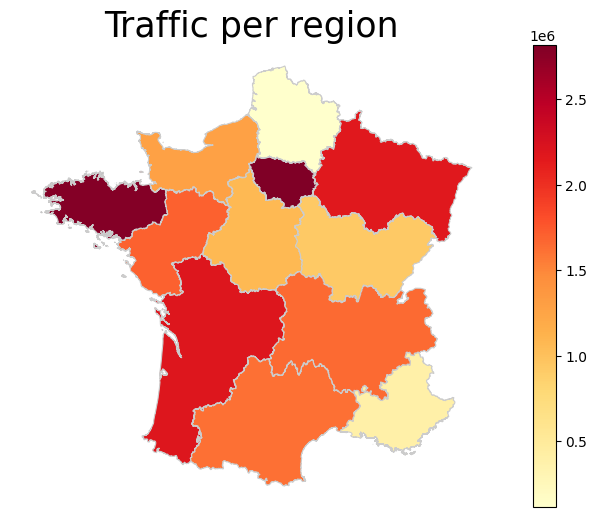

In [23]:
# Create a plot
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('Traffic per region', fontdict={'fontsize': '25', 'fontweight' : '3'})

# Plot the heatmap
merged2.plot(column='traffic', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Show the plot
plt.show()

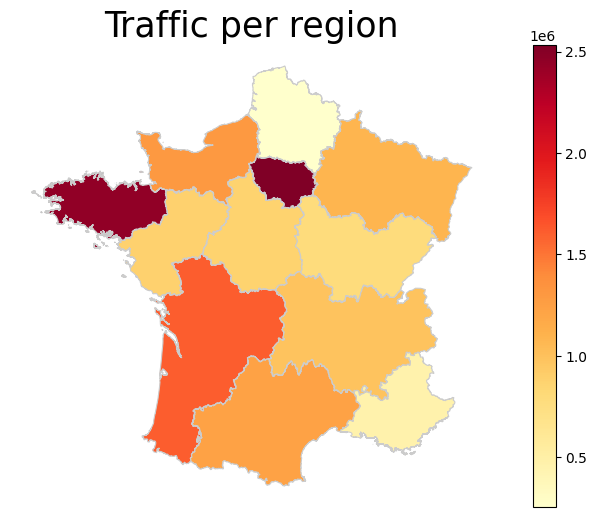

In [24]:
# Create a plot
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('Traffic per region', fontdict={'fontsize': '25', 'fontweight' : '3'})

# Plot the heatmap
merged.plot(column='traffic', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Show the plot
plt.show()

In [26]:
grouped = data_r[['region', 'route', 'TMJA_PL']].groupby(['region', 'route']).mean().reset_index()
grouped['TMJA_PL'] = round(grouped['TMJA_PL'], 2)
grouped

,region,route,TMJA_PL
0,Auvergne-Rhône-Alpes,69D0301,NaN
1,Auvergne-Rhône-Alpes,69D0383,NaN
2,Auvergne-Rhône-Alpes,69D0383BPNL,NaN
3,Auvergne-Rhône-Alpes,A0006,742378.91
4,Auvergne-Rhône-Alpes,A0007,4091794.73
...,...,...,...
381,Île-de-France,N0441,0.00
382,Île-de-France,N0446,0.00
383,Île-de-France,N0449,0.00
384,Île-de-France,N1013,NaN


In [27]:
top_roads = grouped.sort_values(by=['region', 'TMJA_PL'], ascending=False).groupby('region').head(2)
top_roads

,region,route,TMJA_PL
339,Île-de-France,A0012,9942394.00
366,Île-de-France,N0104,8630534.18
326,Provence-Alpes-Côte d'Azur,N1007,1435512.00
319,Provence-Alpes-Côte d'Azur,N0007,926853.10
303,Pays de la Loire,N0844,6534565.08
297,Pays de la Loire,N0137,5131974.00
254,Occitanie,A0621,94833854.00
256,Occitanie,A0624,53998151.67
229,Nouvelle-Aquitaine,N0230,17643098.50
213,Nouvelle-Aquitaine,A0630,10474237.18


## Road Total Distance per region

In [32]:
# Group by region and road and calculate total longueur and average TMJA
road_data = data_r.groupby(['region', 'route']).agg({'longueur': 'sum', 'TMJA_PL': 'mean'}).reset_index()
road_data['TMJA_PL'] = round(road_data['TMJA_PL'], 2)
road_data['longueur'] = road_data['longueur'] / 1000 # convert to thousands of kilometers
road_data = road_data.rename(columns={'longueur': 'longeur (thousands km)', 'TMJA_PL': 'Avg TMJA_PL'})
road_data


,region,route,longeur (thousands km),Avg TMJA_PL
0,Auvergne-Rhône-Alpes,69D0301,6.055,NaN
1,Auvergne-Rhône-Alpes,69D0383,13.752,NaN
2,Auvergne-Rhône-Alpes,69D0383BPNL,2.408,NaN
3,Auvergne-Rhône-Alpes,A0006,43.065,742378.91
4,Auvergne-Rhône-Alpes,A0007,160.704,4091794.73
...,...,...,...,...
381,Île-de-France,N0441,1.000,0.00
382,Île-de-France,N0446,0.550,0.00
383,Île-de-France,N0449,1.450,0.00
384,Île-de-France,N1013,0.702,NaN


## Strategy

To estimate the number of H2 truck charging stations in France in 2030 and 2040, we need to consider several factors such as the number of H2 trucks in France and Europe, the autonomy of trucks, driver regulations, and the motorway network in France. Here are some scenarios that can be considered:

**Scenario 1: H2 Trucks with 1000km Autonomy**
Assuming that all H2 trucks in France have a 1000km autonomy and the current motorway network remains the same, we can estimate the number of H2 truck charging stations required based on the distance between two charging stations, the number of trucks, and the time required for charging. For instance, if we assume that there are 10,000 H2 trucks in France in 2030 and they drive an average of 200 km per day, we would need approximately 50 H2 truck charging stations in France. However, this number would increase if we consider that drivers cannot drive more than 4 hours 30 and need to take breaks for charging, and also if we consider the increase in the number of H2 trucks in Europe that might be driving through France.

**Scenario 2: H2 and Internal Combustion Trucks with 150km Autonomy**
If we assume that only a fraction of the H2 trucks in France have a 1000km autonomy and the rest have a 150km autonomy similar to the internal combustion trucks, we would need to estimate the number of charging stations for both types of trucks. This scenario could be more complex, as we need to consider the ratio between the number of H2 and internal combustion trucks, the driving routes, and the frequency of charging stations for both types of trucks.

**Scenario 3: H2 Trucks with 400km Autonomy**
If we assume that H2 trucks in France have a 400km autonomy, we would need to have more charging stations along the driving routes, especially if the number of H2 trucks in France and Europe increases significantly. Additionally, this scenario might require a larger number of charging stations as drivers would need to take more frequent breaks for charging.

In summary, sizing the network of H2 truck charging stations in France requires taking into consideration several factors such as the number of trucks, autonomy, driving routes, driver regulations, and motorway network. The above scenarios can serve as a starting point for estimating the number of charging stations required, but more detailed analyses and simulations are required to provide accurate estimates.

To calculate the number of trucks needed in each region for each scenario, we need to make some assumptions regarding the following factors:

- Average daily driving time for a truck driver
- Number of working days in a week
- Average truck speed
- Number of refueling stops per day
- Refueling time per stop

In [ ]:
# Define the assumptions for the analysis
daily_driving_time = 9  # hours
working_days = 5  # days per week
average_speed = 80  # km/hour
refueling_stops_per_day = 2
refueling_time_per_stop = 15  # minutes
tank_size_daimler = 2 * 40  # kg
tank_size_nikola = 32  # kg
#tank_size_daf = 150  # km
autonomy_daimler = 1000  # km
autonomy_nikola = 400  # km
autonomy_daf = 150  # km

forecasted_trucks_2030 = 10000
forecasted_trucks_2040 = 60000

In [ ]:
# Define constants
max_drive_time = 4.5
max_daily_drive_time = 9
max_weekly_drive_time = 56
max_consecutive_weeks = 2
max_total_drive_time = 90

average_speed = 80  # km/hour
refueling_stops_per_day = 2
refueling_time_per_stop = 15  # minutes

tank_size_daimler = 2 * 40  # kg
tank_size_nikola = 32  # kg
autonomy_daimler = 1000  # km
autonomy_nikola = 400  # km
autonomy_daf = 150  # km

forecasted_trucks_2030 = 10000
forecasted_trucks_2040 = 60000
